# Simplest use case

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_error_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### create a `Processor` instance and point to the IO directory

In [1]:
from dolphin.processor import Processor

processor = Processor('../io_directory_example/')

### Run a model by calling the  `swim()` method

In [2]:
processor.swim(lens_name='lens_system2', model_id='example', log=False)

Computing the PSO ...
10
20
30
40
50
Max iteration reached! Stopping.
-1.152239803265527 reduced X^2 of best position
-8278.266866561178 logL
14369 effective number of data points
[{'theta_E': 1.2329435719340487, 'gamma': 2.0, 'e1': -0.056218394470708304, 'e2': 0.008789100958435922, 'center_x': 0.03244900708172802, 'center_y': 0.02941514872807032}, {'gamma_ext': 3.57766706677585e-05, 'psi_ext': -0.12923034385999385, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'n_max': 4, 'beta': 0.1599406282738909, 'center_x': 0.2264440953308312, 'center_y': -0.3190574852300294}] source result
[{'amp': 1, 'R_sersic': 2.5492013552000676, 'n_sersic': 4.0, 'e1': -0.09567080425475279, 'e2': 0.0032992486816588134, 'center_x': 0.02606368316212627, 'center_y': -0.024011921987659685}] lens light result
[] point source result
{} special param result
117.36044907569885 time used for  PSO
Computing the PSO ...
10
20
30
40
50
Max iteration reached! Stopping.
-1.1254800951222117 reduced X^2 of best position
-80

  0%|          | 0/100 [00:00<?, ?it/s]/Users/ajshajib/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 100/100 [06:58<00:00,  4.18s/it]

Computing the MCMC...
Number of walkers =  32
Burn-in iterations:  0
Sampling iterations: 100
420.23508191108704 time taken for MCMC sampling


## Let's check the output

In [3]:
from dolphin.analysis.output import Output

output = Output('../io_directory_example/')

-1.0452085695013513 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  1.0452085695013518


/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:82: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',


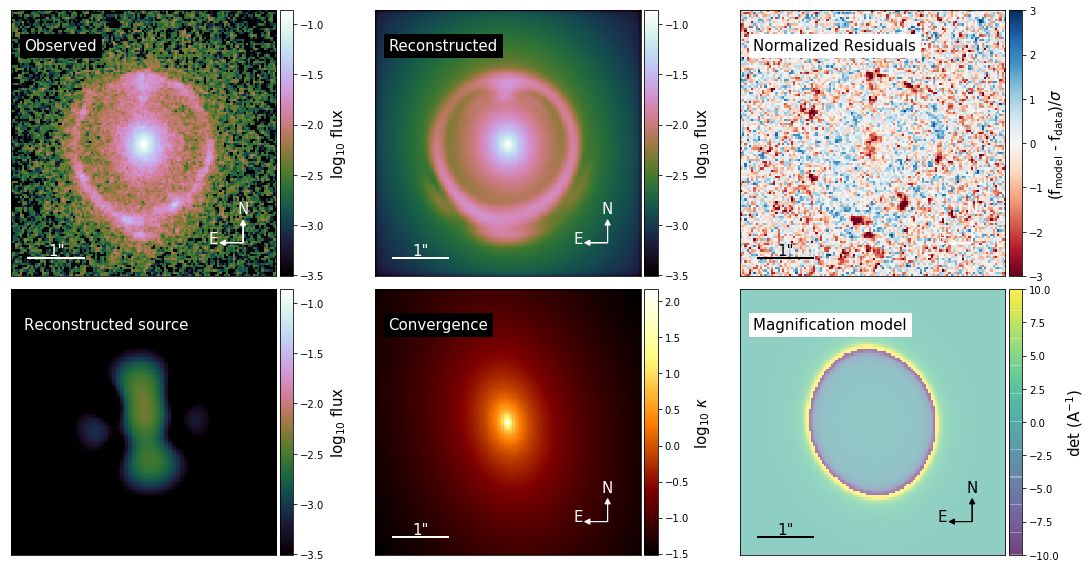

In [4]:
fig = output.plot_model_overview(lens_name='lens_system2', model_id='example')

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [5]:
output.load_output(lens_name='lens_system2', model_id='example')

output.kwargs_result

{'kwargs_lens': [{'theta_E': 1.2470640338612522,
   'gamma': 2.628868821135591,
   'e1': -0.19141707240281336,
   'e2': 0.07817247502080057,
   'center_x': 0.028987149506873044,
   'center_y': -0.021776623387140343},
  {'gamma_ext': 0.0001838787525063044,
   'psi_ext': -0.16786044031838712,
   'ra_0': 0,
   'dec_0': 0}],
 'kwargs_source': [{'amp': 1,
   'n_max': 4,
   'beta': 0.15916265630264212,
   'center_x': 0.0650725132529803,
   'center_y': -0.37709708673923686}],
 'kwargs_lens_light': [{'amp': 1,
   'R_sersic': 2.935324252672379,
   'n_sersic': 4.0,
   'e1': -0.08736063941546512,
   'e2': 0.02764651875821377,
   'center_x': 0.022000174366244216,
   'center_y': -0.044284494233653306}],
 'kwargs_ps': [],
 'kwargs_special': {},
 'kwargs_extinction': []}

When necessary, the settings of the model run---that was read out of the 'config_{lens_name}.yml' file---can be accessed through the `output.model_settings` variable.

In [6]:
output.model_settings

{'system_name': 'lens_system2',
 'band': ['F390W'],
 'pixel_size': 0.04,
 'model': {'lens': ['SPEMD', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE'],
  'source_light': ['SHAPELETS']},
 'lens_option': {'centroid_init': [0.04, -0.04]},
 'lens_light_option': {'fix': {'0': {'n_sersic': 4.0}}},
 'source_light_option': {'n_max': [4]},
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 20, 'num_iteration': 50},
  'sampling': True,
  'sampler': 'MCMC',
  'mcmc_settings': {'burnin_step': 0,
   'iteration_step': 100,
   'walker_ratio': 2}},
 'numeric_option': {'supersampling_factor': [2]}}